In [1]:
# authorize google account to use bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# authorize drive to pull model
from google.colab import drive
drive.mount('/content/drive')

# pull data for repo from bigquery
project_id = 'uic-capstone-int'
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

Authenticated
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# RFdataset creation

In [4]:
df = pd.read_csv('/content/drive/My Drive/Cloudbakers/Assets/Final_ds_193repos.csv')
df.drop(['datetime','Unnamed: 0'], axis=1, inplace=True)
df = df[pd.notnull(df['Status'])]
df.fillna(0, inplace=True)
df.reset_index(level=0, inplace=True)
df.drop('index', axis=1, inplace=True)
df.to_csv('/content/drive/My Drive/Cloudbakers/Assets/RFdataset.csv')

# Random Forest model

In [15]:
df = pd.read_csv('/content/drive/My Drive/Cloudbakers/Assets/RFdataset.csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


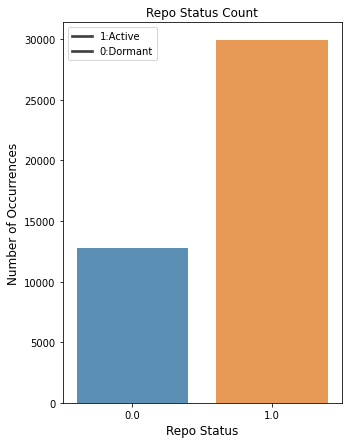

In [17]:
status_count  = df['Status'].value_counts()
fig = plt.figure(facecolor='white', figsize=(5,7) )
sns.barplot(status_count.index, status_count.values, alpha=0.8)
plt.title('Repo Status Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Repo Status', fontsize=12)
plt.legend(['1:Active','0:Dormant'])
plt.show()

In [18]:
df.drop(['Total_count'], axis=1, inplace=True)

In [19]:
y = df['Status']
X = df.drop('Status', axis =1)
y = pd.DataFrame(y)

In [20]:
X.drop(['year','month','day', 'repoID'], axis = 1, inplace=True)

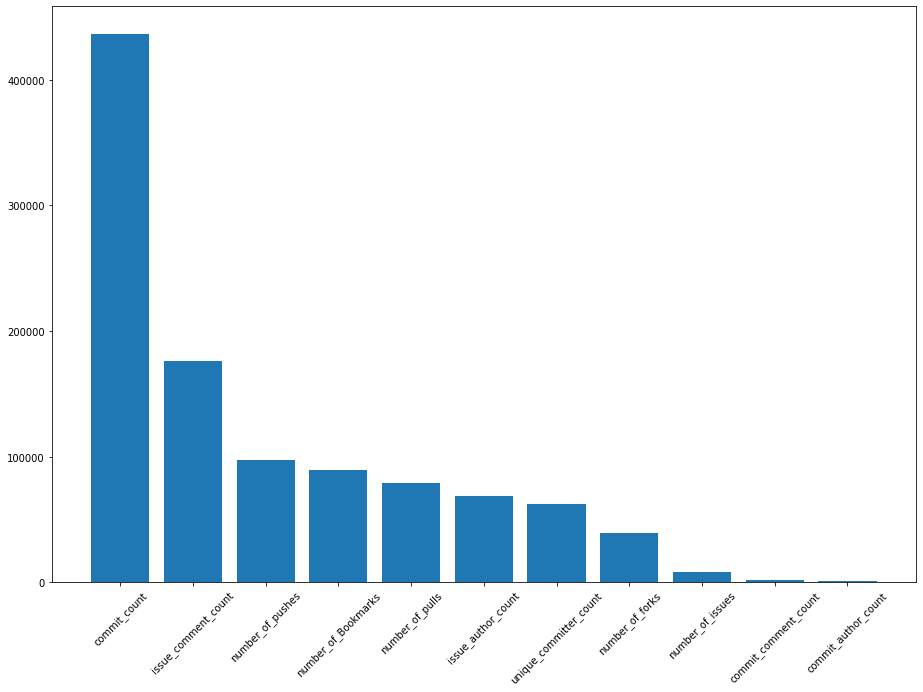

In [21]:
col_sum=X.sum(axis=0)
col_sum.sort_values(ascending=False, inplace=True)
col_sum
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_axes([0,0,2,2])
ax.bar(col_sum.index,col_sum)
plt.xticks(rotation=45)
plt.show()

In [22]:
Columns = X.columns

In [23]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=Columns)
X

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,commit_count,unique_committer_count
0,0.093458,0.000000,0.025773,0.000000,0.002933,0.012552,0.0000,0.000000,0.0,0.002341,0.018868
1,0.135514,0.000000,0.015464,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.001404,0.018868
2,0.373832,0.000000,0.048969,0.000000,0.002933,0.008368,0.0625,0.142857,0.0,0.004213,0.018868
3,0.345794,0.000000,0.064433,0.000000,0.004888,0.016736,0.0000,0.000000,0.0,0.006554,0.018868
4,0.070093,0.011905,0.020619,0.004016,0.001955,0.008368,0.0000,0.000000,0.0,0.001404,0.018868
...,...,...,...,...,...,...,...,...,...,...,...
42713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.005618,0.018868
42714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
42715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.005618,0.018868
42716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.003745,0.018868


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [25]:
# Training a basal random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# Feature importance
rf_predictions = model.predict(X_test)
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

commit_count              0.264367
number_of_Bookmarks       0.153565
number_of_pushes          0.112597
number_of_forks           0.100854
number_of_pulls           0.094967
unique_committer_count    0.091173
issue_comment_count       0.069546
issue_author_count        0.057623
number_of_issues          0.039468
commit_comment_count      0.008188
commit_author_count       0.007650
dtype: float64